# Exploratory analysis

In [1]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(stargazer)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'corrplot' was built under R version 4.1.3"
corrplot 0.92 loaded


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [4]:
# Read and clean data
data <- read.csv("data/shining32.csv")
data$education <- factor(data$education)
col_names <- c("education","gender","location","purchase","brandid","mint","white","fluoride","kids")
data[col_names] <- lapply(data[col_names] , factor)
head(data)

,buyerid,age,education,inc,gender,location,purchase,brandid,mint,white,fluoride,kids,size,discount,familypack,priceperoz,priceperpack,Chosen,SecondChoice
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,Yes,Yes,No,No,4.8,1,0,0.92,4.42,0,NA
2,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,Yes,No,Yes,No,3.9,0,1,0.96,3.74,1,NA
3,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,No,Yes,Yes,Yes,3.9,1,0,1.04,4.06,0,NA
4,1,56,College,79523.2,Female,Brooklyn,Online,Crest,Yes,Yes,No,No,4.8,1,0,0.92,4.42,0,NA
5,1,56,College,79523.2,Female,Brooklyn,Online,Crest,No,No,Yes,Yes,4.8,1,0,1.01,4.85,0,NA
6,1,56,College,79523.2,Female,Brooklyn,Online,Sensodyne,Yes,No,No,No,3.9,0,0,1.15,4.49,0,NA


## Summary

In [5]:
summary(data)

    buyerid           age                    education          inc       
 Min.   :    1   Min.   :32.00   College          :73390   Min.   :42612  
 1st Qu.: 2501   1st Qu.:46.00   High School      : 5900   1st Qu.:66360  
 Median : 5000   Median :49.00   More than College:20710   Median :70868  
 Mean   : 5000   Mean   :48.96                             Mean   :71104  
 3rd Qu.: 7500   3rd Qu.:52.00                             3rd Qu.:75659  
 Max.   :10000   Max.   :66.00                             Max.   :97505  
                                                                          
    gender           location         purchase          brandid     
 Female:51310   Brooklyn :38270   In Store:56070   Aquafresh:30000  
 Male  :47650   Manhattan:51290   Online  :43930   Colgate  :30000  
 Other : 1040   Other    :  700                    Crest    :20000  
                Queens   : 9740                    Sensodyne:20000  
                                                       

## Identifying products

In [6]:
productCharacteristics <- unique(data[,c("brandid","mint","white","fluoride","kids")])
productCharacteristics

,brandid,mint,white,fluoride,kids
,<fct>,<fct>,<fct>,<fct>,<fct>
1,Colgate,Yes,Yes,No,No
2,Colgate,Yes,No,Yes,No
3,Colgate,No,Yes,Yes,Yes
4,Crest,Yes,Yes,No,No
5,Crest,No,No,Yes,Yes
6,Sensodyne,Yes,No,No,No
7,Sensodyne,No,Yes,Yes,No
8,Aquafresh,Yes,No,Yes,No
9,Aquafresh,No,Yes,No,Yes


In [7]:
data$productId <-0
for (i in 1:10){
    data$productId[data$brandid == productCharacteristics[i,1] &
                     data$mint        == productCharacteristics[i,2] &
                     data$white       == productCharacteristics[i,3] &
                     data$fluoride    == productCharacteristics[i,4] &
                     data$kids        == productCharacteristics[i,5]
                    ] <- i
}

data$productId <- as.factor(data$productId)
head(data,12)

,buyerid,age,education,inc,gender,location,purchase,brandid,mint,white,fluoride,kids,size,discount,familypack,priceperoz,priceperpack,Chosen,SecondChoice,productId
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
1,1,56,College,79523.20,Female,Brooklyn,Online,Colgate,Yes,Yes,No,No,4.8,1,0,0.92,4.42,0,NA,1
2,1,56,College,79523.20,Female,Brooklyn,Online,Colgate,Yes,No,Yes,No,3.9,0,1,0.96,3.74,1,NA,2
3,1,56,College,79523.20,Female,Brooklyn,Online,Colgate,No,Yes,Yes,Yes,3.9,1,0,1.04,4.06,0,NA,3
4,1,56,College,79523.20,Female,Brooklyn,Online,Crest,Yes,Yes,No,No,4.8,1,0,0.92,4.42,0,NA,4
5,1,56,College,79523.20,Female,Brooklyn,Online,Crest,No,No,Yes,Yes,4.8,1,0,1.01,4.85,0,NA,5
6,1,56,College,79523.20,Female,Brooklyn,Online,Sensodyne,Yes,No,No,No,3.9,0,0,1.15,4.49,0,NA,6
7,1,56,College,79523.20,Female,Brooklyn,Online,Sensodyne,No,Yes,Yes,No,3.9,1,0,1.09,4.25,0,NA,7
8,1,56,College,79523.20,Female,Brooklyn,Online,Aquafresh,Yes,No,Yes,No,3.9,1,1,0.85,3.32,0,NA,8
9,1,56,College,79523.20,Female,Brooklyn,Online,Aquafresh,No,Yes,No,Yes,3.9,1,1,0.96,3.74,0,NA,9


## Codify categorical variables

In [8]:
# income
data$income.cat <- ""
data$income.cat[data$inc < quantile(data$inc,0.33)] <- "low"
data$income.cat[data$inc < quantile(data$inc,0.66) & 
                              (data$inc >= quantile(data$inc,0.33))] <- "medium"
data$income.cat[data$inc >= quantile(data$inc,0.66)] <- "high"
data$income.cat <- factor(data$income.cat, levels = c("low", "medium", "high"))

data$income.low <- as.numeric(data$inc < quantile(data$inc,0.33))
data$income.med <- as.numeric((data$inc < quantile(data$inc,0.66)) & 
                              (data$inc >= quantile(data$inc,0.33)))
data$income.high <- as.numeric(data$inc >= quantile(data$inc,0.66))

# age
data$age.cat <- ""
data$age.cat[data$age < 45] <- "below 45"
data$age.cat[data$age < 50 & data$age >= 45] <- "below 50"
data$age.cat[data$age < 55 & data$age >= 50] <- "below 55"
data$age.cat[data$age >= 55] <- "above 55"
data$age.cat <- factor(data$age.cat,levels=c("below 45","below 50","below 55","above 55"))

data$age.below45 <- as.numeric(data$age < 45 )
data$age.below50 <- as.numeric(data$age < 50 & data$age >= 45)
data$age.below55 <- as.numeric(data$age < 55 & data$age >= 50)
data$age.above55 <- as.numeric(data$age >= 55)

# education
data$educ.highschool  <- as.numeric(data$education == "High School")
data$educ.college     <- as.numeric(data$education == "College")
data$educ.plusCollege <- as.numeric(data$education == "More than College")
# gender
data$gender.female <- as.numeric(data$gender == "Female")
data$gender.male   <- as.numeric(data$gender == "Male")
data$gender.other  <- as.numeric(data$gender == "Other")
# location
data$loc.brooklyn  <- as.numeric(data$location == "Brooklyn")
data$loc.manhattan <- as.numeric(data$location == "Manhattan")
data$loc.queens    <- as.numeric(data$location == "Queens")
data$loc.other     <- as.numeric(data$location == "Other")
# purchase
data$purchase.inStore <- as.numeric(data$purchase == "In Store")
data$purchase.online  <- as.numeric(data$purchase == "Online")
# brand
data$brand.aquafresh <- as.numeric(data$brandid == "Aquafresh")
data$brand.colgate   <- as.numeric(data$brandid == "Colgate")
data$brand.sensodyne <- as.numeric(data$brandid == "Sensodyne")
data$brand.crest     <- as.numeric(data$brandid == "Crest")
# mint
data$mint.yes  <- as.numeric(data$mint == "Yes")
# white
data$white.yes <- as.numeric(data$white == "Yes")
# fluoride
data$fluoride.yes <- as.numeric(data$fluoride == "Yes")
# kids
data$kids.yes <- as.numeric(data$kids == "Yes")
# product id
data$product.id1 <- as.numeric(data$productId == 1)
data$product.id2 <- as.numeric(data$productId == 2)
data$product.id3 <- as.numeric(data$productId == 3)
data$product.id4 <- as.numeric(data$productId == 4)
data$product.id5 <- as.numeric(data$productId == 5)
data$product.id6 <- as.numeric(data$productId == 6)
data$product.id7 <- as.numeric(data$productId == 7)
data$product.id8 <- as.numeric(data$productId == 8)
data$product.id9 <- as.numeric(data$productId == 9)
data$product.id10 <- as.numeric(data$productId == 10)
head(data)
summary(data)

,buyerid,age,education,inc,gender,location,purchase,brandid,mint,white,⋯,product.id1,product.id2,product.id3,product.id4,product.id5,product.id6,product.id7,product.id8,product.id9,product.id10
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,Yes,Yes,⋯,1,0,0,0,0,0,0,0,0,0
2,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,Yes,No,⋯,0,1,0,0,0,0,0,0,0,0
3,1,56,College,79523.2,Female,Brooklyn,Online,Colgate,No,Yes,⋯,0,0,1,0,0,0,0,0,0,0
4,1,56,College,79523.2,Female,Brooklyn,Online,Crest,Yes,Yes,⋯,0,0,0,1,0,0,0,0,0,0
5,1,56,College,79523.2,Female,Brooklyn,Online,Crest,No,No,⋯,0,0,0,0,1,0,0,0,0,0
6,1,56,College,79523.2,Female,Brooklyn,Online,Sensodyne,Yes,No,⋯,0,0,0,0,0,1,0,0,0,0


    buyerid           age                    education          inc       
 Min.   :    1   Min.   :32.00   College          :73390   Min.   :42612  
 1st Qu.: 2501   1st Qu.:46.00   High School      : 5900   1st Qu.:66360  
 Median : 5000   Median :49.00   More than College:20710   Median :70868  
 Mean   : 5000   Mean   :48.96                             Mean   :71104  
 3rd Qu.: 7500   3rd Qu.:52.00                             3rd Qu.:75659  
 Max.   :10000   Max.   :66.00                             Max.   :97505  
                                                                          
    gender           location         purchase          brandid     
 Female:51310   Brooklyn :38270   In Store:56070   Aquafresh:30000  
 Male  :47650   Manhattan:51290   Online  :43930   Colgate  :30000  
 Other : 1040   Other    :  700                    Crest    :20000  
                Queens   : 9740                    Sensodyne:20000  
                                                       

## Look at correlations

### Pairwise correlations between characteristics

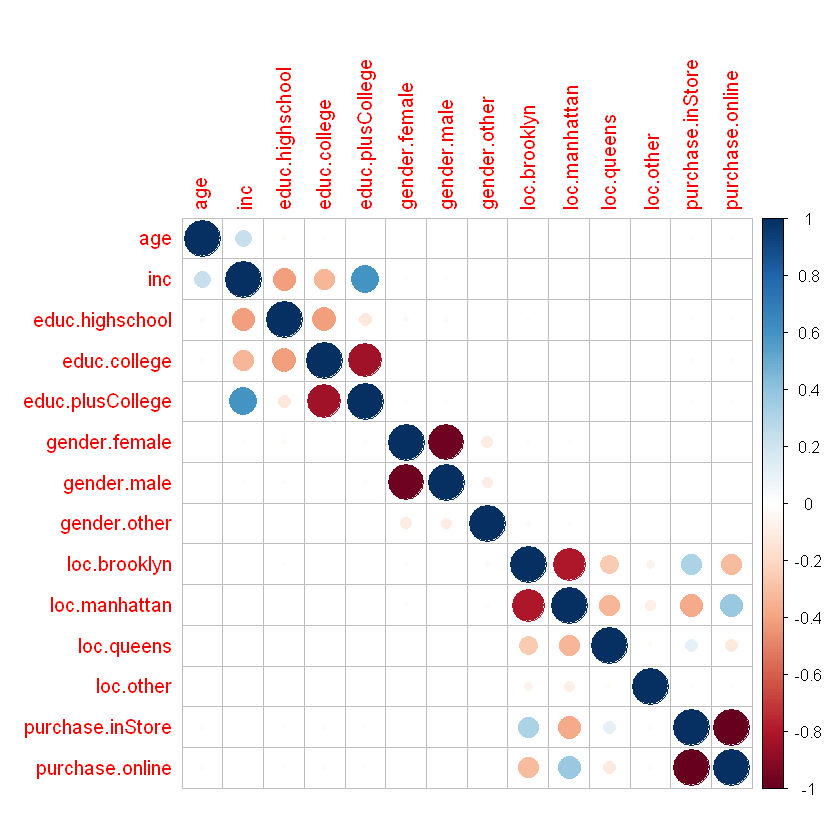

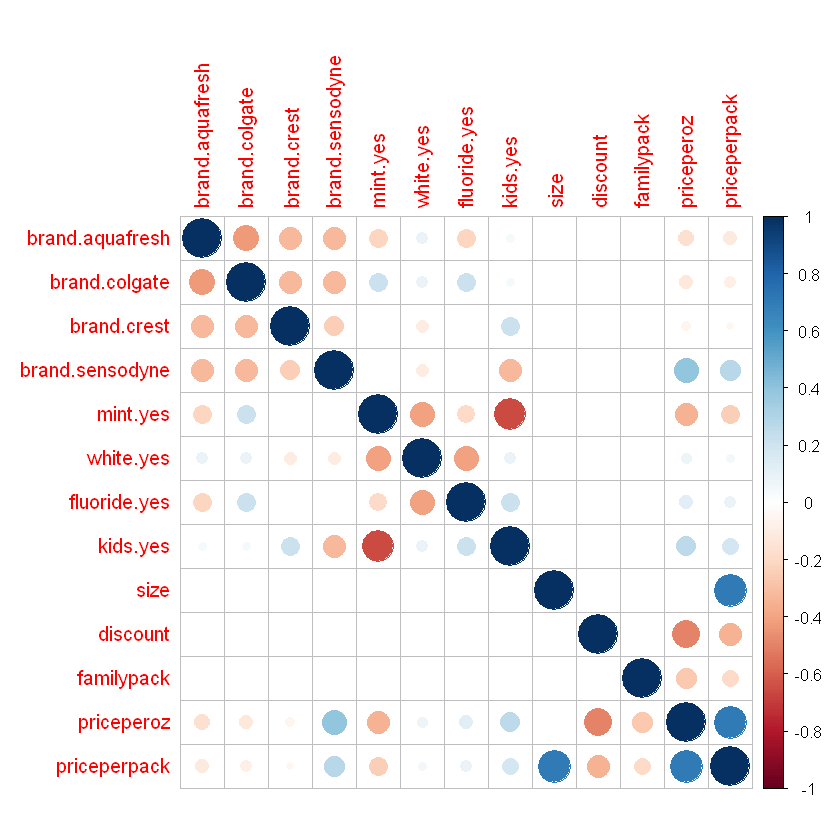

In [9]:
consumerCharacts <- c("age","inc","educ.highschool", "educ.college", "educ.plusCollege",
                      "gender.female","gender.male","gender.other",
                      "loc.brooklyn","loc.manhattan", "loc.queens","loc.other",
                      "purchase.inStore","purchase.online")

productCharacts  <- c("brand.aquafresh","brand.colgate","brand.crest","brand.sensodyne",
                      "mint.yes","white.yes","fluoride.yes","kids.yes","size","discount","familypack","priceperoz",
                     "priceperpack")

corrplot(cor(unique(data[,consumerCharacts])))
corrplot(cor(unique(data[,productCharacts])))

### Choices by consumer characteristics

In [12]:
dataChosen <- data[data$Chosen == 1,]
dataChosen$size <- (dataChosen$size-min(dataChosen$size))/(max(dataChosen$size)-min(dataChosen$size))
dataChosen$inc <- dataChosen$inc/1000

consumerCharacts <- c("age.cat","income.cat","education", "location", "gender","purchase")
productCharacts  <- c("brandid","mint","white","fluoride","kids","size","discount","familypack")


# colgate
mod_1 <- glm(brand.colgate ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# aquafresh
mod_2 <- glm(brand.aquafresh ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# crest
mod_3 <- glm(brand.crest ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# sensodyne
mod_35 <- glm(brand.sensodyne ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# mint
mod_4 <- glm(mint.yes ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# white
mod_5 <- glm(white.yes ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# fluoride
mod_6 <- glm(fluoride.yes ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# kids
mod_7 <- glm(kids.yes ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# size
mod_8 <- glm(size ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# discount
mod_9 <- glm(discount ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# family pack
mod_10 <- glm(familypack ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen, family = "binomial")
# prize per pack
mod_11 <- glm(priceperpack   ~ age + inc + educ.college + educ.plusCollege +
                        loc.brooklyn + loc.manhattan + loc.queens +
                        gender.female + gender.male + purchase.inStore, data = dataChosen)

#### By brand

In [13]:
stargazer(mod_1,mod_2,mod_3,mod_35,mod_11,type="text")


                                           Dependent variable:                          
                  ----------------------------------------------------------------------
                  brand.colgate brand.aquafresh brand.crest brand.sensodyne priceperpack
                    logistic       logistic      logistic      logistic        normal   
                       (1)            (2)           (3)           (4)           (5)     
----------------------------------------------------------------------------------------
age                   0.009         -0.010        -0.004        -0.007         0.001    
                     (0.006)        (0.008)       (0.011)       (0.009)       (0.001)   
                                                                                        
inc                   0.004         -0.002        -0.014*        0.003        0.002**   
                     (0.004)        (0.006)       (0.008)       (0.007)       (0.001)   
                    

#### Other characteristics

In [ ]:
stargazer(mod_4,mod_5,mod_6,mod_7,mod_8,mod_9,mod_10,type="text")


                                               Dependent variable:                             
                  -----------------------------------------------------------------------------
                   mint.yes  white.yes  fluoride.yes kids.yes     size     discount  familypack
                     (1)        (2)         (3)         (4)       (5)        (6)        (7)    
-----------------------------------------------------------------------------------------------
age                 0.004      -0.002      0.004      -0.008     0.003      0.001    -0.015*** 
                   (0.014)    (0.006)     (0.006)     (0.021)   (0.006)    (0.009)    (0.005)  
                                                                                               
inc                 0.010     -0.010**     0.008*     -0.027*    0.004    -0.018***    0.003   
                   (0.011)    (0.005)     (0.004)     (0.016)   (0.005)    (0.006)    (0.004)  
                                       